# **Employee Resignation Prediction Using Supervised Learning Models**

**Name:** Varna George

**Organization:** Entri Elevate

**Date:** 21.11.2025


<h3> 1. Overview of Problem Statement </h3>
<p> Employee resignation is one of the most critical issues in Human Resources management. High employee turnover leads to increased recruitment costs, reduced productivity, and loss of skilled workforce. Organizations need predictive models that identify employees likely to resign. Predicting which employees are likely to resign helps HR teams take proactive measures, improve work conditions, and reduce turnover costs. </p> <p> This project uses machine learning to classify whether an employee will resign based on factors like performance score, job role, overtime hours, training, promotions, team size, satisfaction score, salary, and demographics. </p>

<h3> 2. Objective </h3>
<p> To develop the most accurate employee resignation prediction model using multiple supervised machine learning algorithms and evaluate their performance using classification metrics. </p>

<h3> 3. Data Description </h3>


*   Source: Employee Performance and Productivity Data (Kaggle)
*   Features: This dataset contains 100,000 rows of data capturing key aspects of employee performance, productivity, and demographics in a corporate environment. It includes details related to the employee's job, work habits, education, performance, and satisfaction.

      *   Employee_ID: Unique identifier for each employee.
      *   Department: The department in which the employee works (e.g., Sales, HR, IT).
      *   Gender: Gender of the employee (Male, Female, Other).
      *   Age: Employee's age (between 22 and 60).
      *   Job_Title: The role held by the employee (e.g., Manager, Analyst, Developer).
      *   Hire_Date: The date the employee was hired.
      *   Years_At_Company: The number of years the employee has been working for the company.
      *   Education_Level: Highest educational qualification (High School, Bachelor, Master, PhD).
      *   Performance_Score: Employee's performance rating (1 to 5 scale).
      *   Monthly_Salary: The employee's monthly salary in USD, correlated with job title and performance score.
      *   Work_Hours_Per_Week: Number of hours worked per week.
      *   Projects_Handled: Total number of projects handled by the employee.
      *   Overtime_Hours: Total overtime hours worked in the last year.
      *   Sick_Days: Number of sick days taken by the employee.
      *   Remote_Work_Frequency: Percentage of time worked remotely (0%, 25%, 50%, 75%, 100%).
      *   Team_Size: Number of people in the employee's team.
      *   Training_Hours: Number of hours spent in training.
      *   Promotions: Number of promotions received during their tenure.
      *   Employee_Satisfaction_Score: Employee satisfaction rating (1.0 to 5.0 scale).
      *   Resigned: Boolean value indicating if the employee has resigned.

The dataset contains 100,000 rows and 19 features + 1 target (Resigned)

<h3> 4. Data Collection </h3>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
#load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments - Data Science with Gen AI/Employee Resignation Prediction - Mini Project/Extended_Employee_Performance_and_Productivity_Data.csv")
df.head(3)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False


In [ ]:
df.shape

(100000, 20)

In [ ]:
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
std,28867.657797,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

<h3> 5. Data Preprocessing - Data Cleaning </h3>

In [ ]:
#drop Employee_ID, Hire_Date
df.drop(columns=['Employee_ID', 'Hire_Date'], inplace=True)

Columns such as Employee_ID and Hire_Date were dropped. Employee_ID is a unique identifier with no predictive value, and Hire_Date is redundant because employee tenure is already captured by the Years_At_Company feature.

In [ ]:
#to detect incorrect / inconsistent entries like spelling mistakes, extra spaces, special characters, mixed categories in categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("-----------------------------")

Unique values in Department:
['IT' 'Finance' 'Customer Support' 'Engineering' 'Marketing' 'HR'
 'Operations' 'Sales' 'Legal']
-----------------------------
Unique values in Gender:
['Male' 'Female' 'Other']
-----------------------------
Unique values in Job_Title:
['Specialist' 'Developer' 'Analyst' 'Manager' 'Technician' 'Engineer'
 'Consultant']
-----------------------------
Unique values in Education_Level:
['High School' 'Bachelor' 'Master' 'PhD']
-----------------------------


No incorrect / inconsistent entries found in categorical columns.

In [ ]:
#to check for missing values
df.isnull().sum()

,0
Department,0
Gender,0
Age,0
Job_Title,0
Years_At_Company,0
Education_Level,0
Performance_Score,0
Monthly_Salary,0
Work_Hours_Per_Week,0
Projects_Handled,0


No missing values found, so imputation not required.

In [ ]:
#to check for duplicate values
df.duplicated().sum()

np.int64(0)

No duplicates found.

In [ ]:
#to select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", num_cols.tolist())

#function to count outliers column-wise
outlier_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    outlier_summary[col] = outliers
#display outlier count
outlier_summary

Numerical Columns: ['Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score']


{'Age': np.int64(0),
 'Years_At_Company': np.int64(0),
 'Performance_Score': np.int64(0),
 'Monthly_Salary': np.int64(0),
 'Work_Hours_Per_Week': np.int64(0),
 'Projects_Handled': np.int64(0),
 'Overtime_Hours': np.int64(0),
 'Sick_Days': np.int64(0),
 'Remote_Work_Frequency': np.int64(0),
 'Team_Size': np.int64(0),
 'Training_Hours': np.int64(0),
 'Promotions': np.int64(0),
 'Employee_Satisfaction_Score': np.int64(0)}

No outliers found.

In [ ]:
#to check for skewness in numerical features
df[num_cols].skew()

,0
Age,-0.006170
Years_At_Company,0.011211
Performance_Score,0.004008
Monthly_Salary,0.101291
Work_Hours_Per_Week,0.009621
Projects_Handled,0.009682
Overtime_Hours,-0.001167
Sick_Days,-0.003320
Remote_Work_Frequency,-0.001901
Team_Size,-0.000592


All skewness values found to be between −0.5 and +0.5, indicating approximately normal distributions.
Therefore, no need to  apply transformation (log/sqrt transform)  for skewness correction.

<h3> 6. Exploratory Data Analysis (EDA) </h3>

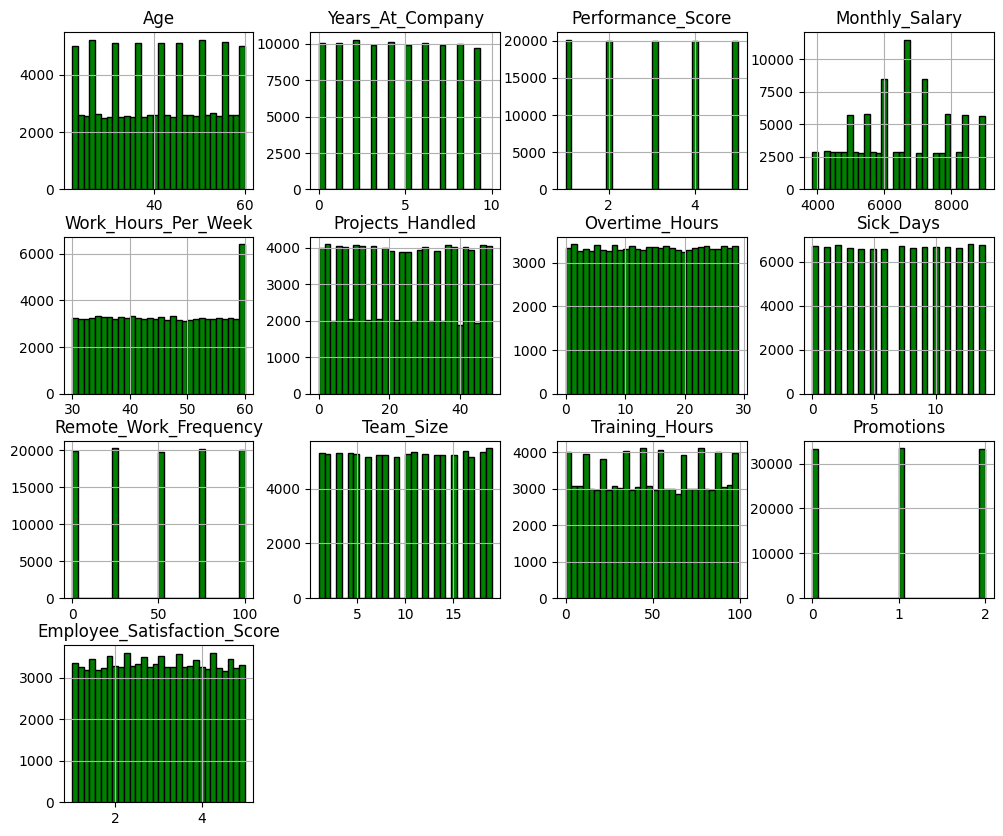

In [ ]:
#Univariate Analysis – Numerical Features
#to plot histograms for all numerical features to understand their distributions and identify potential skewness or outliers
import matplotlib.pyplot as plt
df[num_cols].hist(figsize=(12,10), bins=30, edgecolor='black',color = 'g')
plt.show()

*   The distributions appear roughly symmetric.
*   Performance-related variables such as Performance_Score and Employee_Satisfaction_Score are on a 1–5 scale and show good spread across categories.

In [ ]:
#Target Variable Analysis – Resigned
df['Resigned'].value_counts()
df['Resigned'].value_counts(normalize=True) * 100

,proportion
Resigned,
False,89.99
True,10.01


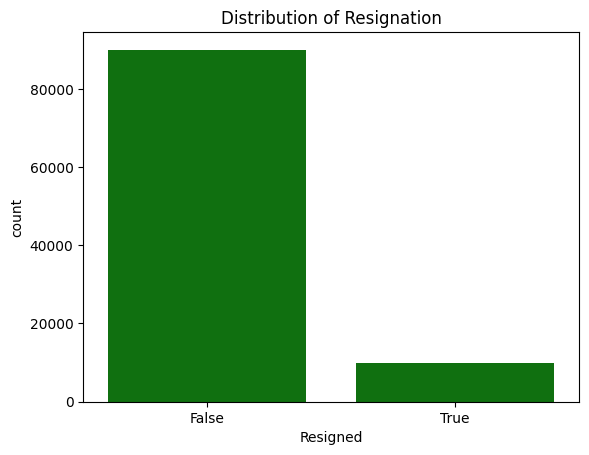

In [ ]:
import seaborn as sns
sns.countplot(x='Resigned', data=df,color = 'g')
plt.title("Distribution of Resignation")
plt.show()

The target variable "Resigned" is highly imbalanced, approximately 89.99% of employees have not resigned, while only 10.01% have resigned. This class imbalance will be addressed during model building using SMOTE technique to improve prediction performance for the minority (resigned) class.

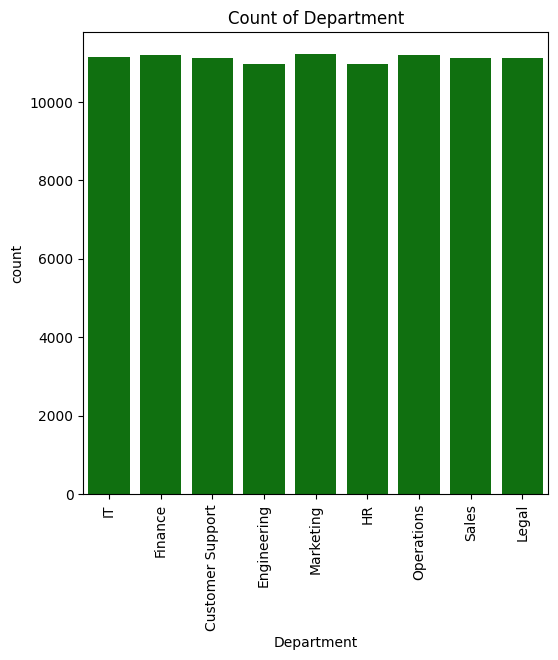

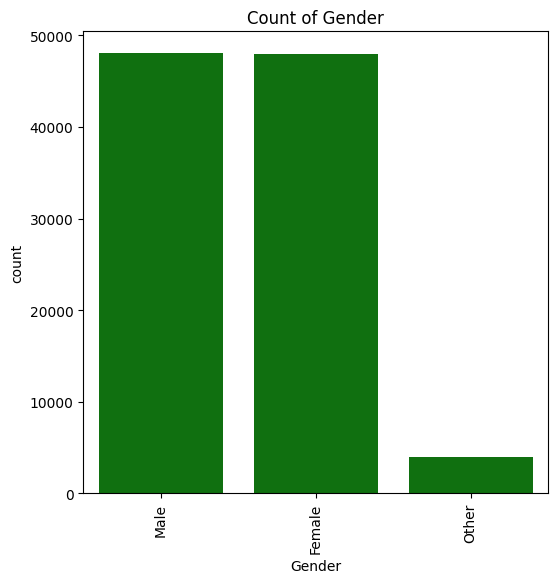

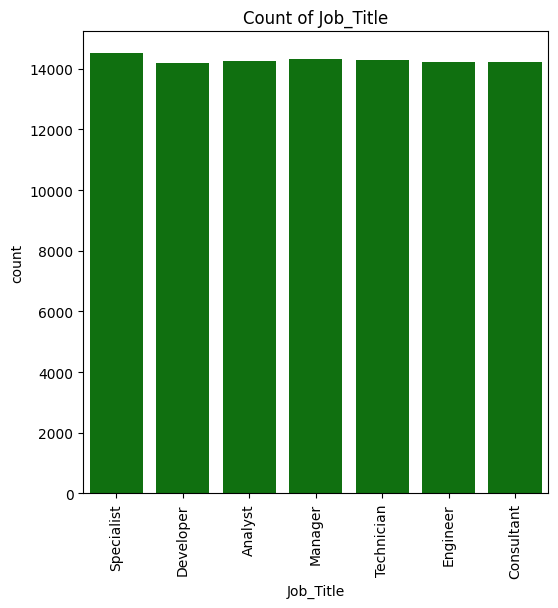

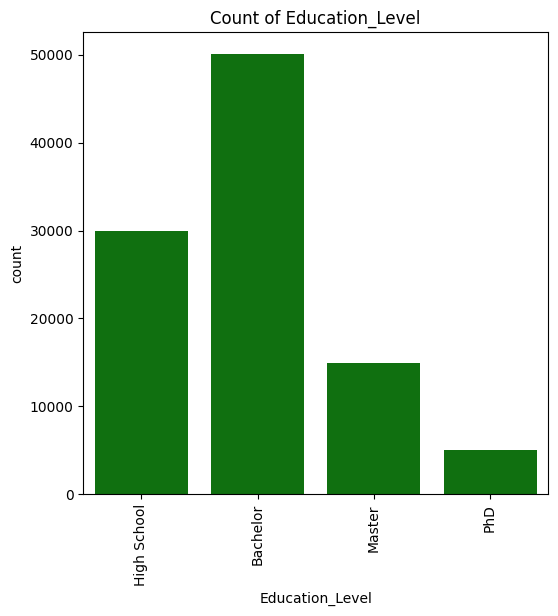

In [ ]:
#Univariate Analysis – Categorical Features
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6,6))
    sns.countplot(x=col, data=df,color = 'g')
    plt.xticks(rotation=90)
    plt.title(f"Count of {col}")
    plt.show()


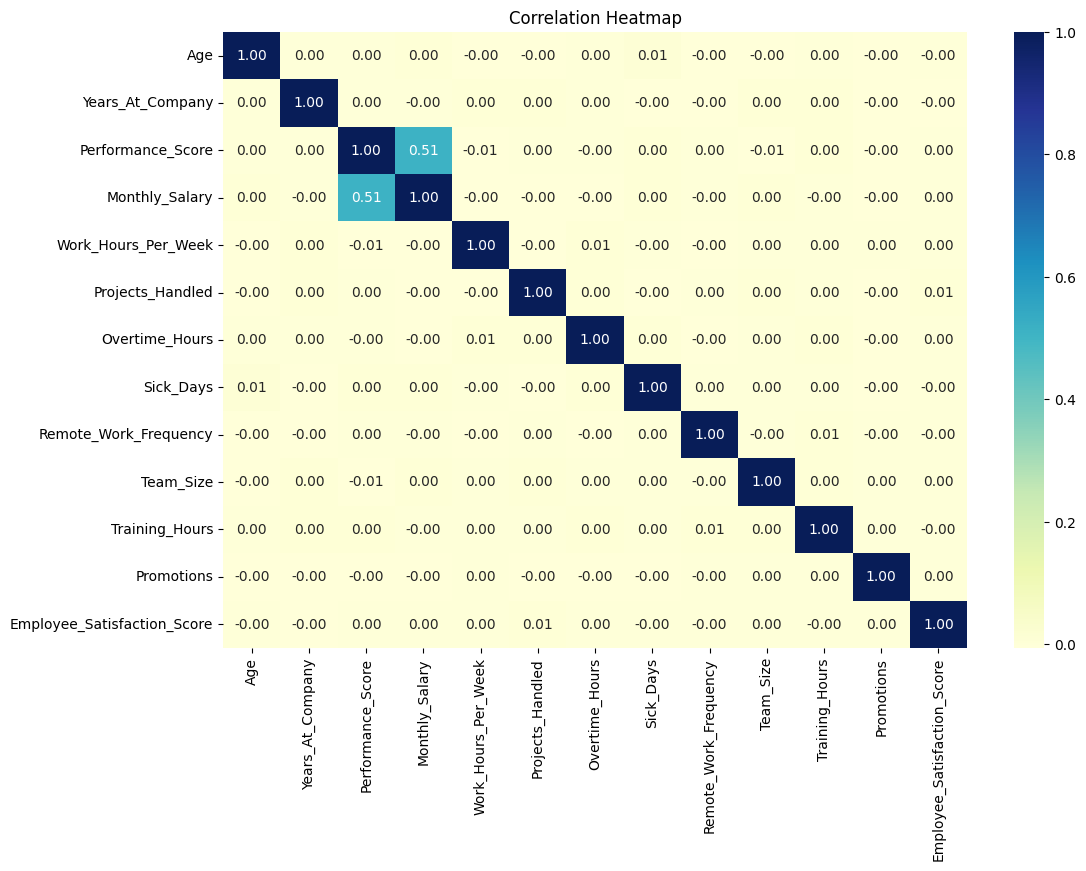

In [ ]:
#correlation heatmap
numeric_df = df.select_dtypes(include=['int64','float64'])
corr = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True,  cmap = "YlGnBu", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The only moderately strong positive correlation (≈ 0.51) was observed between Performance_Score and Monthly_Salary, suggesting that employees with higher performance ratings generally receive higher salaries.

<h3> 7. Feature Engineering </h3>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Department                   100000 non-null  object 
 1   Gender                       100000 non-null  object 
 2   Age                          100000 non-null  int64  
 3   Job_Title                    100000 non-null  object 
 4   Years_At_Company             100000 non-null  int64  
 5   Education_Level              100000 non-null  object 
 6   Performance_Score            100000 non-null  int64  
 7   Monthly_Salary               100000 non-null  float64
 8   Work_Hours_Per_Week          100000 non-null  int64  
 9   Projects_Handled             100000 non-null  int64  
 10  Overtime_Hours               100000 non-null  int64  
 11  Sick_Days                    100000 non-null  int64  
 12  Remote_Work_Frequency        100000 non-null  int64  
 13  

In [ ]:
import numpy as np

#to create new/engineered features (from existing columns)
df['Total_Annual_Hours'] = df['Work_Hours_Per_Week'] * 52 + df['Overtime_Hours']
df['Projects_per_Year'] = df['Projects_Handled'] / df['Years_At_Company'].replace(0, np.nan)
df['Sick_Days_per_Year'] = df['Sick_Days'] / df['Years_At_Company'].replace(0, np.nan)
df['Salary_per_Performance'] = df['Monthly_Salary'] / df['Performance_Score'].replace(0, np.nan)
df['Promotion_Rate'] = df['Promotions'] / df['Years_At_Company'].replace(0, np.nan)
df['Productivity'] = (df['Monthly_Salary'] * 12) / df['Total_Annual_Hours']
df['Efficiency']  = df['Projects_Handled'] / df['Total_Annual_Hours']
df['Overtime_Ratio'] = df['Overtime_Hours'] / df['Total_Annual_Hours'].replace(0, np.nan)
df.head()

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,...,Employee_Satisfaction_Score,Resigned,Total_Annual_Hours,Projects_per_Year,Sick_Days_per_Year,Salary_per_Performance,Promotion_Rate,Productivity,Efficiency,Overtime_Ratio
0,IT,Male,55,Specialist,2,High School,5,6750.0,33,32,...,2.63,False,1738,16.000000,1.000000,1350.0,0.000000,46.605293,0.018412,0.012658
1,Finance,Male,29,Developer,0,High School,5,7500.0,34,34,...,1.72,False,1781,NaN,NaN,1500.0,NaN,50.533408,0.019090,0.007299
2,Finance,Male,55,Specialist,8,High School,3,5850.0,37,27,...,3.17,False,1930,3.375000,0.375000,1950.0,0.000000,36.373057,0.013990,0.003109
3,Customer Support,Female,48,Analyst,7,Bachelor,2,4800.0,52,10,...,1.86,False,2732,1.428571,1.714286,2400.0,0.142857,21.083455,0.003660,0.010249
4,Engineering,Female,36,Analyst,3,Bachelor,2,4800.0,38,11,...,1.25,False,2005,3.666667,4.333333,2400.0,0.333333,28.728180,0.005486,0.014464


In [ ]:
#to check null values in engineered features
df.isnull().sum()

,0
Department,0
Gender,0
Age,0
Job_Title,0
Years_At_Company,0
Education_Level,0
Performance_Score,0
Monthly_Salary,0
Work_Hours_Per_Week,0
Projects_Handled,0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

#to impute NaNs in engineered features
for col in ['Projects_per_Year', 'Sick_Days_per_Year', 'Promotion_Rate']:
    df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
df.isnull().sum()

,0
Department,0
Gender,0
Age,0
Job_Title,0
Years_At_Company,0
Education_Level,0
Performance_Score,0
Monthly_Salary,0
Work_Hours_Per_Week,0
Projects_Handled,0


In [ ]:
#encode target
df['Resigned'] = df['Resigned'].astype(int)

In [ ]:
#one hot encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Age                          100000 non-null  int64  
 1   Years_At_Company             100000 non-null  int64  
 2   Performance_Score            100000 non-null  int64  
 3   Monthly_Salary               100000 non-null  float64
 4   Work_Hours_Per_Week          100000 non-null  int64  
 5   Projects_Handled             100000 non-null  int64  
 6   Overtime_Hours               100000 non-null  int64  
 7   Sick_Days                    100000 non-null  int64  
 8   Remote_Work_Frequency        100000 non-null  int64  
 9   Team_Size                    100000 non-null  int64  
 10  Training_Hours               100000 non-null  int64  
 11  Promotions                   100000 non-null  int64  
 12  Employee_Satisfaction_Score  100000 non-null  float64
 13  

In [ ]:
df.head()

,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,...,Gender_Other,Job_Title_Consultant,Job_Title_Developer,Job_Title_Engineer,Job_Title_Manager,Job_Title_Specialist,Job_Title_Technician,Education_Level_High School,Education_Level_Master,Education_Level_PhD
0,55,2,5,6750.0,33,32,22,2,0,14,...,0,0,0,0,0,1,0,1,0,0
1,29,0,5,7500.0,34,34,13,14,100,12,...,0,0,1,0,0,0,0,1,0,0
2,55,8,3,5850.0,37,27,6,3,50,10,...,0,0,0,0,0,1,0,1,0,0
3,48,7,2,4800.0,52,10,28,12,100,10,...,0,0,0,0,0,0,0,0,0,0
4,36,3,2,4800.0,38,11,29,13,100,15,...,0,0,0,0,0,0,0,0,0,0


<h3> 8. Feature Selection </h3>

In [ ]:
X = df.drop('Resigned', axis=1)   #all features
y = df['Resigned']                #target

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=30) #to choose top 30 features
X_new = selector.fit_transform(X, y)

selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]

print("Selected features by SelectKBest:")
print(selected_features)

#to keep only these features in a new DataFrame
X_kbest = X[selected_features]


Selected features by SelectKBest:
Index(['Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary',
       'Projects_Handled', 'Overtime_Hours', 'Sick_Days',
       'Remote_Work_Frequency', 'Team_Size', 'Training_Hours', 'Promotions',
       'Employee_Satisfaction_Score', 'Projects_per_Year',
       'Sick_Days_per_Year', 'Salary_per_Performance', 'Promotion_Rate',
       'Efficiency', 'Overtime_Ratio', 'Department_Engineering',
       'Department_Finance', 'Department_HR', 'Department_IT',
       'Department_Legal', 'Department_Sales', 'Gender_Other',
       'Job_Title_Developer', 'Job_Title_Engineer', 'Job_Title_Manager',
       'Job_Title_Specialist', 'Education_Level_PhD'],
      dtype='object')


<h3> 9. Split Data into Training and Testing Sets </h3>

In [ ]:
from sklearn.model_selection import train_test_split

#to use only the selected 30 features
X = X_kbest

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)
#use of stratify=y: while splitting, keep the same proportion of 0s and 1s in both train and test as in the full dataset.”


In [ ]:
#to handle imbalanced data using SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE class balance:\n", y_train.value_counts(normalize=True))
print("\nAfter SMOTE class balance:\n", y_train_sm.value_counts(normalize=True))

Before SMOTE class balance:
 Resigned
0    0.8999
1    0.1001
Name: proportion, dtype: float64

After SMOTE class balance:
 Resigned
0    0.5
1    0.5
Name: proportion, dtype: float64


<h3> 10. Feature Scaling </h3>

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sm_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled     = scaler.transform(X_test)

<h3> 11. Build the ML Models </h3>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

<h3> 12. Model Evaluation </h3>

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

for name, model in models.items():
    model.fit(X_train_sm_scaled, y_train_sm)
    y_pred = model.predict(X_test_scaled)

    print("\n======================================\n")
    print("Model:", name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.68205
Confusion Matrix:
 [[13109  4889]
 [ 1470   532]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.80     17998
           1       0.10      0.27      0.14      2002

    accuracy                           0.68     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.82      0.68      0.74     20000



Model: Decision Tree
Accuracy: 0.77345
Confusion Matrix:
 [[15189  2809]
 [ 1722   280]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87     17998
           1       0.09      0.14      0.11      2002

    accuracy                           0.77     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.82      0.77      0.79     20000



Model: Random Forest
Accuracy: 0.87775
Confusion Matrix:
 [[17498   500]
 [ 1945    57]]
Classification Repo

<h3> 13. Hyperparameter Tuning </h3>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#base model
rf = RandomForestClassifier(random_state=42)

#parameter distributions to try
param_dist = {
    'n_estimators': randint(100, 300),     #number of trees
    'max_depth': [None, 5, 10, 20, 30],     #depth of each tree
    'min_samples_split': randint(2, 10),   #min samples to split
    'min_samples_leaf': randint(1, 4),     #min samples in leaf
    'max_features': ['sqrt', 'log2']       #features considered at each split
}

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=25,           # try 25 combinations
    scoring='f1',        # optimize F1 for class 1
    cv=5,                # 5-fold cross-validation
    verbose=1,
    n_jobs=-1,           # use all cores
    random_state=42
)

search.fit(X_train_sm_scaled, y_train_sm)

print("Best Parameters for Random Forest:", search.best_params_)
print("\nBest Cross-Validated F1 Score:", search.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 234}

Best Cross-Validated F1 Score: 0.8989909262292359


RandomizedSearchCV is used instead of GridSearchCV to reduce computation time, as the dataset contains 100000 records. A limited number of random hyperparameter combinations (n_iter = 25) evaluated using 5-fold cross-validation.

RandomizedSearchCV was used with 5-fold cross-validation to tune the Random Forest classifier. The best set of hyperparameters found was: n_estimators = 234, max_depth = None, min_samples_split = 4, min_samples_leaf = 1, which achieved a mean cross-validated F1-score of approximately 0.89

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

best_rf = search.best_estimator_

y_pred_best = best_rf.predict(X_test_scaled)

print("Tuned Random Forest Performance on Test Set")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Tuned Random Forest Performance on Test Set
Accuracy: 0.8787
Confusion Matrix:
 [[17521   477]
 [ 1949    53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94     17998
           1       0.10      0.03      0.04      2002

    accuracy                           0.88     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.82      0.88      0.85     20000



<h3> 14. Save the Model </h3>


In [ ]:
import joblib

#to save model to a file
joblib.dump(best_rf, "employee_resignation_rf_model.pkl")

print("Model saved as employee_resignation_rf_model.pkl")


Model saved as employee_resignation_rf_model.pkl


<h3> 15. Interpretation of Results (Conclusion) </h3>


Random Forest was selected as one of the main models for employee resignation prediction. After applying RandomizedSearchCV for hyperparameter tuning, the overall accuracy improved slightly from 87.78% to 87.87%. The confusion matrix shows a small reduction in false positives (from 500 to 477) and a slight improvement in the F1-score for the majority “Not Resigned” class.

However, the performance for the minority “Resigned” class did not significantly improve. The recall for this class remained very low (around 3%), meaning the model is still unable to correctly identify most employees who actually resign. This highlights the challenge of working with an imbalanced dataset: even after tuning, the model tends to favor the majority class to maintain high overall accuracy.

Therefore, while hyperparameter tuning marginally improved overall metrics, it did not solve the main business problem of reliably detecting employees at risk of resignation. In a real-world scenario, additional techniques (such as different resampling strategies, class weights, or alternative algorithms) would be needed to better handle the minority class.

<h3> 16. Future Work </h3>

*   Future work could focus on techniques like adjusting class weights, threshold tuning, or more advanced resampling methods to better detect resigned employees.
*   Exploring time-series analysis on employee performance over time.

